In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading data

df = pd.read_csv('data_mod.csv')
df.head(2)

,Salesman_ID,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
0,CA-3697,2012,897,140.2,935,488,125759,976,0.5,125759.4
1,AL-9060,2012,759,121.0,869,349,183678,698,0.5,91839.0


Since the variables 'revenue_actual' and 'Pipeline Revenue' are linearly correlated, 'revenue_actual' is considered for further analysis. Also, as 'revenue_actual' is a combination 'Units Sold * Unit Price', those two can also be neglected for further analysis.

Also, the variables New_customer_count and New_customer_acquisition_target are linearly related. And hence, only New_cusomter_count is considered for analysis.

**P.S : The creation of additional variables, and correlation plots are in the notebook 'overall.ipynb'**

In [13]:
# Taking only the details for year 2016 and previous year

df2 = df.query('Year == 2016').append(df.query('Year == 2015'))

In [71]:
gb = df2.groupby(['Salesman_ID', 'Year'], as_index=False).sum()[['Salesman_ID', 'Year','revenue_actual', 'Customer_connects_count', 'New_customer_count', 'target_ratio']]
gb.head()

,Salesman_ID,Year,revenue_actual,Customer_connects_count,New_customer_count,target_ratio
0,AA-5468,2015,52143.0,913,62,0.5
1,AA-5468,2016,22746.0,637,117,1.0
2,AL-3791,2015,93125.9,942,221,1.0
3,AL-3791,2016,33001.2,647,99,1.0
4,AL-6234,2015,59747.6,882,230,1.0


In [92]:
for idx in gb.index:
    if idx % 2 != 0:
        gb.loc[idx,'connect_inc'] = (- gb.loc[idx - 1, 'Customer_connects_count'] + gb.loc[idx, 'Customer_connects_count']) / gb.loc[idx - 1, 'Customer_connects_count']
        gb.loc[idx,'new_cus_inc'] = (- gb.loc[idx - 1, 'New_customer_count'] + gb.loc[idx, 'New_customer_count']) / gb.loc[idx - 1, 'New_customer_count']
        gb.loc[idx, 'rev_inc'] = (- gb.loc[idx - 1, 'revenue_actual'] + gb.loc[idx, 'revenue_actual']) / gb.loc[idx - 1, 'revenue_actual']
gb.head()

,Salesman_ID,Year,revenue_actual,Customer_connects_count,New_customer_count,target_ratio,connect_inc,new_cus_inc,rev_inc
0,AA-5468,2015,52143.0,913,62,0.5,NaN,NaN,NaN
1,AA-5468,2016,22746.0,637,117,1.0,-0.302300,0.887097,-0.563777
2,AL-3791,2015,93125.9,942,221,1.0,NaN,NaN,NaN
3,AL-3791,2016,33001.2,647,99,1.0,-0.313163,-0.552036,-0.645628
4,AL-6234,2015,59747.6,882,230,1.0,NaN,NaN,NaN


In the above cells, three new columns which gives us the percentage increase from 2015 to 2016 for revenue_actual, customer_connect_count, and 'New_customer_count'.

In [95]:
# Dropping 2015 cells
gb.dropna(how='any', axis=0, inplace=True)

In [96]:
gb.head()

,Salesman_ID,Year,revenue_actual,Customer_connects_count,New_customer_count,target_ratio,connect_inc,new_cus_inc,rev_inc
1,AA-5468,2016,22746.0,637,117,1.0,-0.302300,0.887097,-0.563777
3,AL-3791,2016,33001.2,647,99,1.0,-0.313163,-0.552036,-0.645628
5,AL-6234,2016,6220.8,244,25,0.5,-0.723356,-0.891304,-0.895882
7,AL-9060,2016,56217.7,820,243,0.5,-0.096916,-0.402948,-0.025977
9,AP-3690,2016,35190.0,872,212,1.0,-0.079197,1.000000,2.199644


In [97]:
gb['normalized_rev'] = (gb.revenue_actual - gb.revenue_actual.mean())/(gb.revenue_actual.max() - gb.revenue_actual.min())

In [100]:
# Feature scaling other three percentage change parameters using Mean normalization
gb['normalized_connect'] = (gb.connect_inc - gb.connect_inc.mean())/(gb.connect_inc.max() - gb.connect_inc.min())
gb['normalized_new_cus'] = (gb.new_cus_inc - gb.new_cus_inc.mean())/(gb.new_cus_inc.max() - gb.new_cus_inc.min())
gb['normalized_rev_inc'] = (gb.rev_inc - gb.rev_inc.mean())/(gb.rev_inc.max() - gb.rev_inc.min())

In [101]:
gb.head()

,Salesman_ID,Year,revenue_actual,Customer_connects_count,New_customer_count,target_ratio,connect_inc,new_cus_inc,rev_inc,normalized_rev,normalized_connect,normalized_new_cus,normalized_rev_inc
1,AA-5468,2016,22746.0,637,117,1.0,-0.302300,0.887097,-0.563777,-0.227900,-0.108151,-0.045220,-0.120740
3,AL-3791,2016,33001.2,647,99,1.0,-0.313163,-0.552036,-0.645628,-0.139860,-0.111574,-0.082445,-0.129154
5,AL-6234,2016,6220.8,244,25,0.5,-0.723356,-0.891304,-0.895882,-0.369768,-0.240844,-0.091221,-0.154876
7,AL-9060,2016,56217.7,820,243,0.5,-0.096916,-0.402948,-0.025977,0.059451,-0.043425,-0.078589,-0.065462
9,AP-3690,2016,35190.0,872,212,1.0,-0.079197,1.000000,2.199644,-0.121070,-0.037841,-0.042300,0.163299


Now since all necessary features are between -0.5 and +0.5, now we can assign weights to the features. Since, **revenue_actual (normalized)** is the most important paramter for performance assigning **8** as weight. 

For the next feature, assigning change in customer count (normalized), ie) **normalized_connect** is given a weight of **4**. 

For change in revenue (normalized), ie) **normalized_rev_inc** a weight of **1** is assigned, as those who already had a high revenue may not have very high change the next year. 

For the remaining feature, ie) **normalized_new_cus** a weight of **2** is assigned.

A weighted method with different weights is used to give higher priority to features that are more important

In [102]:
gb['weighted'] = gb.normalized_rev * 8 + gb.normalized_connect * 4 + gb.normalized_new_cus * 2 + gb.normalized_rev_inc


In [106]:
sorted_df = gb[['Salesman_ID', 'weighted']].sort_values('weighted', ascending=False)

In [107]:
# Top 5 Performers for the FY 2016
sorted_df.head()

,Salesman_ID,weighted
83,RI-1155,6.576274
45,MO-6223,5.978020
67,NY-9092,5.946474
49,MS-7667,5.561779
71,OH-9268,5.165997


In [108]:
# Bottom 5 performers for the FY 2016
sorted_df.tail()

,Salesman_ID,weighted
81,PA-4952,-3.336990
23,HI-9241,-3.649439
97,VT-1811,-3.652401
53,NC-6029,-3.869866
5,AL-6234,-4.258838


#### For top 5 perfomers, the visualizations are given below

In [131]:
# Selecting top 5 perfomers data from original DataFrame
top_df = pd.DataFrame()
for s_id in sorted_df.head().Salesman_ID.values:
    top_df = top_df.append(df[df['Salesman_ID'] == s_id], ignore_index=True)

In [132]:
top_df.head(10)

,Salesman_ID,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
0,RI-1155,2012,673,136.9,811,219,92134,219,1.0,92133.7
1,RI-1155,2013,561,107.0,818,186,60027,372,0.5,60027.0
2,RI-1155,2014,717,129.1,931,87,185129,87,1.0,92564.7
3,RI-1155,2015,81,149.9,476,11,24284,22,0.5,12141.9
4,RI-1155,2016,853,121.9,875,274,103981,548,0.5,103980.7
5,MO-6223,2012,886,111.7,926,81,98966,162,0.5,98966.2
6,MO-6223,2013,316,139.8,615,142,44177,142,1.0,44176.8
7,MO-6223,2014,775,136.0,816,442,210800,884,0.5,105400.0
8,MO-6223,2015,90,110.3,229,57,19854,114,0.5,9927.0
9,MO-6223,2016,781,102.7,790,376,80209,752,0.5,80208.7


In [143]:
#Selecting only 2016 details
top_df_2016 = top_df.query('Year == 2016')[['Salesman_ID','revenue_actual', 'New_customer_count', 'Customer_connects_count']]

In [144]:
top_df_2016

,Salesman_ID,revenue_actual,New_customer_count,Customer_connects_count
4,RI-1155,103980.7,274,875
9,MO-6223,80208.7,376,790
14,NY-9092,114168.0,410,950
19,MS-7667,108836.0,291,947
24,OH-9268,117952.2,691,835


In [153]:
df_2016 = df.query('Year == 2016')

**PS**  
**red line = mean**    
**green line = max**

Colors inverted for the bottom performers graph


Text(0,0.5,'Revenue Generated')

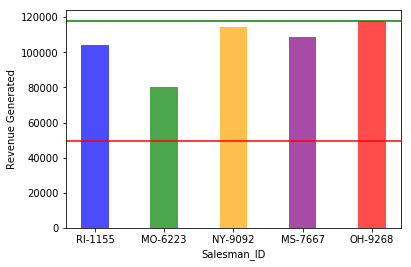

In [185]:
colors = ['blue', 'green', 'orange', 'purple', 'red']
plt.bar(x=top_df_2016.Salesman_ID, height=top_df_2016.revenue_actual, width=0.4, color=colors, alpha=0.7)
plt.axhline(df_2016.revenue_actual.mean(), color='red')
plt.axhline(df_2016.revenue_actual.max(), color='green')
plt.xlabel('Salesman_ID')
plt.ylabel('Revenue Generated')

The above bar plot, plots the top 5 performers actual revenue. The horizontal **green** line is max of **revenue_actual** in the year 2016, while the horizontal **red** line is the mean of the same

Text(0.5,0,'Salesman ID')

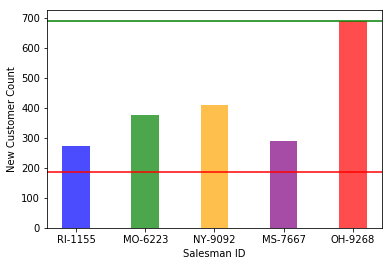

In [160]:
colors = ['blue', 'green', 'orange', 'purple', 'red']
plt.bar(x=top_df_2016.Salesman_ID, height=top_df_2016.New_customer_count, width=0.4, color=colors, alpha=0.7)
plt.axhline(df_2016.New_customer_count.mean(), color='red')
plt.axhline(df_2016.New_customer_count.max(), color='green')
plt.ylabel('New Customer Count')
plt.xlabel('Salesman ID')

From this above bar chart, we can observe that for the salesman, they have considerably less customer count, yet made it to the top because of the method of weight used. But since, considering the **revenue_actual**, the values are all near the max, we can safely assume that, our selection of weights are quite good.

(0.0, 1200)

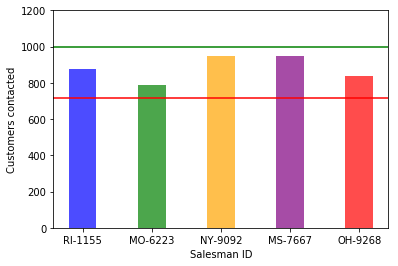

In [171]:
colors = ['blue', 'green', 'orange', 'purple', 'red']
plt.bar(x=top_df_2016.Salesman_ID, height=top_df_2016.Customer_connects_count, width=0.4, color=colors, alpha=0.7)
plt.axhline(df_2016.Customer_connects_count.mean(), color='red')
plt.axhline(df_2016.Customer_connects_count.max(), color='green')
plt.ylabel('Customers contacted')
plt.xlabel('Salesman ID')
plt.ylim(ymax=1200)

For the number of customers contacted, the selected perfomers are quite close to max which again reflects the fact that weighting assigned is good.

#### For bottom 5 perfomers, the visualizations are as below

**P.S**

**red line = min**           
**green line = mean**

In [172]:
# Selecting top 5 perfomers data from original DataFrame
bottom_df = pd.DataFrame()
for s_id in sorted_df.tail().Salesman_ID.values:
    bottom_df = bottom_df.append(df[df['Salesman_ID'] == s_id], ignore_index=True)

In [173]:
#Selecting only 2016 details
bottom_df_2016 = bottom_df.query('Year == 2016')[['Salesman_ID','revenue_actual', 'New_customer_count', 'Customer_connects_count']]

Text(0.5,0,'Salesman ID')

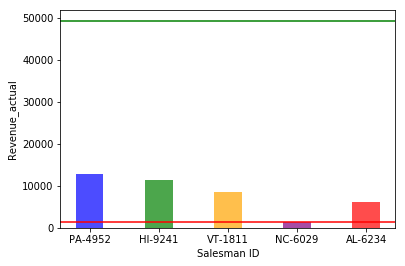

In [177]:
colors = ['blue', 'green', 'orange', 'purple', 'red']
plt.bar(x=bottom_df_2016.Salesman_ID, height=bottom_df_2016.revenue_actual, width=0.4, color=colors, alpha=0.7)
plt.axhline(df_2016.revenue_actual.min(), color='red')
plt.axhline(df_2016.revenue_actual.mean(), color='green')
plt.ylabel('Revenue_actual')
plt.xlabel('Salesman ID')

As seen from the above bar graph, all the values are way less than the mean (**green line**). These are bottom performers as per our weighted metric

Text(0.5,0,'Salesman ID')

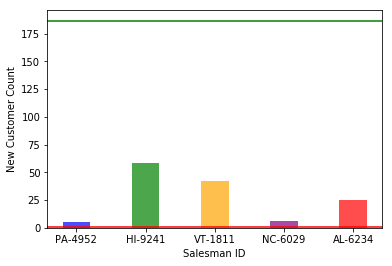

In [178]:
colors = ['blue', 'green', 'orange', 'purple', 'red']
plt.bar(x=bottom_df_2016.Salesman_ID, height=bottom_df_2016.New_customer_count, width=0.4, color=colors, alpha=0.7)
plt.axhline(df_2016.New_customer_count.min(), color='red')
plt.axhline(df_2016.New_customer_count.mean(), color='green')
plt.ylabel('New Customer Count')
plt.xlabel('Salesman ID')

Text(0.5,0,'Salesman ID')

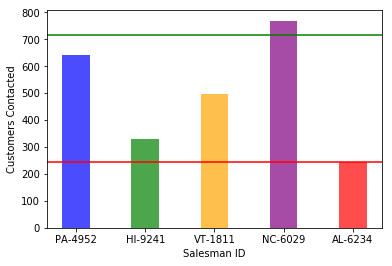

In [184]:
colors = ['blue', 'green', 'orange', 'purple', 'red']
plt.bar(x=bottom_df_2016.Salesman_ID, height=bottom_df_2016.Customer_connects_count, width=0.4, color=colors, alpha=0.7)
plt.axhline(df_2016.Customer_connects_count.mean(), color='green')
plt.axhline(df_2016.Customer_connects_count.min(), color='red')
plt.ylabel('Customers Contacted')
plt.xlabel('Salesman ID')

Three of the bottom perfomers 'Customers contacted' is quite close to the min (**red line**), and thus from considering all the plots so far, we can conclude that our **weighted metric is fairly correct**, as it has captured the top and bottom performers quite correctly in every features chosen

## Summary

**Metrics chosen**

1. Revenue_actual which is product of Units_sold and Unit_price  

2. New_customer_count   

3. Customer_connects_count

**Metrics Neglected**

1. Pipeline Revenue. Reason : This had very high correlation with 'revenue_actual' and is an indicative of future performance, not the current year one. Linearity has been found and plotted in notebook **Overall.ipynb**. Please, check with that notebook.

2. Units_Sold, Unit_Price. Reason : Since, revenue actual is combination of method, these two are neglected.

3. New_customer_target_acquisition. Reason : High linearity with New_customer_count.

P.S : Correlation found out using Correlation Matrix and Scatter Matrix

### Processing

First, incremental changes from 2015 to 2016, for the features where found out and added to the dataframe. Then these incremental changes were scaled using **Mean Normalization** to make their values fall under the range of -0.5 to +0.5. Also, the column 'revenue_actual' also has been mean normalized.

Weights were assigned according to the importance of the Normalized Features.

1. *Normalized revenue_actual* ie) 'normalized_rev' is assigned with 8, as it is most important indicative of a salesperson's performance.   

2. Change in customer count (normalized), ie) **normalized_connect** is given a weight of **4** as the number of customers contacted will reflect the number of items sold.    

3. Change in revenue (normalized), ie) **normalized_rev_inc** a weight of **1** is assigned, as those who already had a high revenue may not have very high change the next year, and giving a higher weight to this will penalize those who had higher revenue last year.     

4. For **normalized_new_cus** a weight of **2** is assigned as the number of new customers increases the chances of sales of the product.

### Output

After the weights were assigned, a combined metric is formed and is sorted to find top and bottom 5 performers, then using the Salesman_ID, their performance for the year 2016 is obtained. Then, the data is plotted to see if our weight assignment is good or bad.

For the top and and bottom performer's ID's, they are in the below two cells

In [187]:
# Top 5 perfomers
print(top_df_2016.Salesman_ID.values)

['RI-1155' 'MO-6223' 'NY-9092' 'MS-7667' 'OH-9268']


In [188]:
#Bottom 5 performers
print(bottom_df_2016.Salesman_ID.values)

['PA-4952' 'HI-9241' 'VT-1811' 'NC-6029' 'AL-6234']
